# Wissensbasierte Systeme 
## ML-Übung #2 SOM

**Dozenten:** Dr. Sina Keller, M.sc. Felix Riese

**Datum:** 29.11.2017

**Abgabedatum:** 10.12.2017

**Autor:** Dominik Wunderlich

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import h5py
import matplotlib.pyplot as plt

### Einlesen des Datensatzes

[Download der Daten](http://www2.ipf.kit.edu/Projekte/code/EnMAP_Contest.zip) mit [Beschreibung](https://www.ipf.kit.edu/downloads/Instructions_EnMAP_Contest.pdf)

Die Datei `EnMAP_Contest_Data.mat` wurde in das Verzeichnis dieses Notebooks heruntergeladen.

In [2]:
datadict = {}
with h5py.File("./EnMAP_Contest_Data.mat", 'r') as f:
    for k, v in f.items():
        datadict[k] = np.array(v)

print(datadict.keys())

dict_keys(['Im', 'cm', 'lx', 'ly', 'xi', 'yi'])


### Meine Self Organizing Map (SOM)

In [3]:
from selforganizingmap import SOM

#### sklearn-load_iris-Datensatz

0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
Genauigkeit:  0.943661971831

Hier sieht man, wie die SOM die Trainingsdatensätze einsortiert:


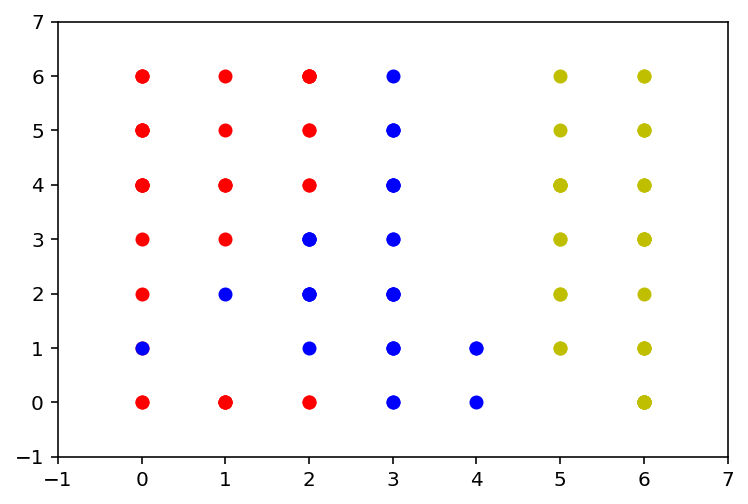

In [18]:
import sklearn.datasets
(X, y) = sklearn.datasets.load_iris(return_X_y=True)

# Teilen in Trainings- und Evaluationsdatensatz
indices_train = np.random.randint(150, size=110)
indices_evaluate = [index for index in list(range(150)) if (index not in list(indices_train))]

n_rows = 7
n_cols = 7

# my_first_som = SOM(n_rows=n_rows, n_cols=n_cols, iterations_max=10000, alpha_0=0.9, sigma_0=9, neighbor_function='gauss')
my_first_som = SOM(n_rows=7, n_cols=7, iterations_max=10000, alpha_0=0.9, sigma_0=1, neighbor_function='8')

my_first_som.fit(X[indices_train,:], y[indices_train])

for index in indices_train:
    dataset = X[index]
    coords = my_first_som.classify(dataset)
    dataset_class = int(y[index])
    if dataset_class > -1:
        cm = ['y', 'b', 'r']
        plt.plot(coords[0], coords[1], color=cm[dataset_class], marker='o')
    
plt.axis([-1, n_cols, -1, n_rows])

print("Genauigkeit: ", my_first_som.score(X[indices_evaluate], y[indices_evaluate]), end='\n\n')
print("Hier sieht man, wie die SOM die Trainingsdatensätze einsortiert:")

Hier sieht man, wo die SOM die Evaluationsdatensätze einsortiert:


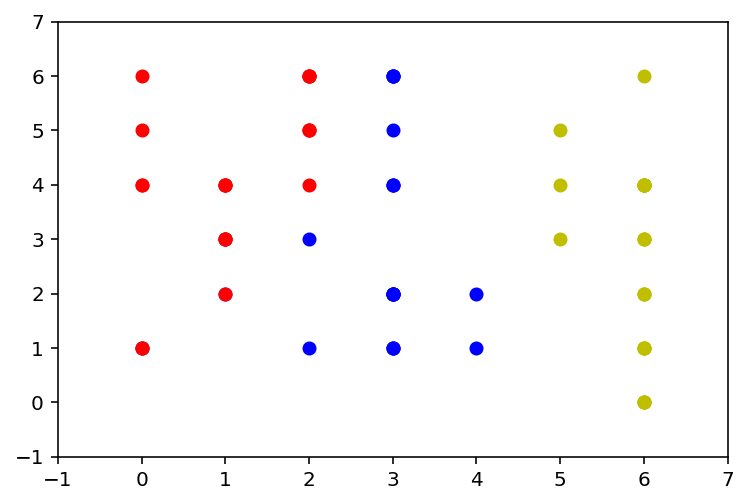

In [19]:
for index in indices_evaluate:
    dataset = X[index]
    coords = my_first_som.classify(dataset)
    dataset_class = int(y[index])
    if dataset_class > -1:
        cm = ['y', 'b', 'r']
        plt.plot(coords[0], coords[1], color=cm[dataset_class], marker='o')
    
plt.axis([-1, n_cols, -1, n_rows])
print("Hier sieht man, wo die SOM die Evaluationsdatensätze einsortiert:")    

#### EnMAP-Contest-Datensatz

0% 10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 
Genauigkeit: 0.814056939502

Hier sieht man, wie die SOM die Trainingsdatensätze einsortiert:


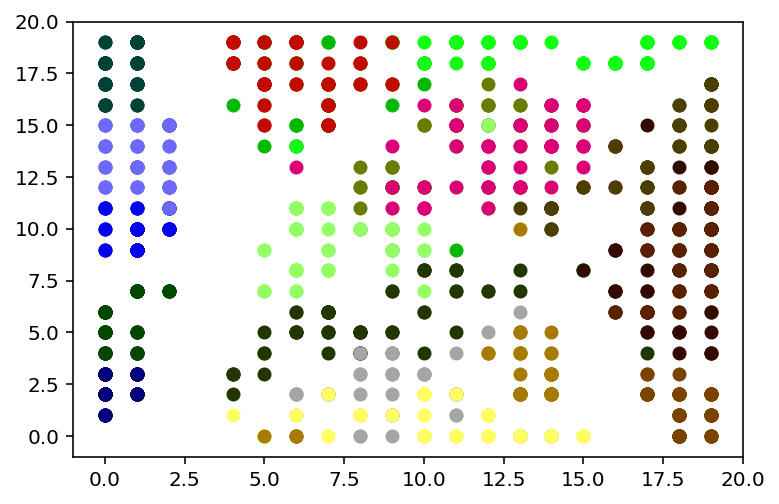

In [21]:
n_rows = 20
n_cols = 20

# my_som = SOM(n_rows=n_rows, n_cols=n_cols, iterations_max=5000, alpha_0=0.9, sigma_0=9, neighbor_function='gauss')
my_som = SOM(n_rows=n_rows, n_cols=n_cols, iterations_max=10000, alpha_0=0.9, sigma_0=1, neighbor_function='8')
my_som.fit(datadict["xi"].T, datadict["lx"].T.ravel())

for index, dataset in enumerate(datadict["yi"].T):
    coords = my_som.classify(dataset)
    dataset_class = int(datadict["ly"].T[index])
    if dataset_class :
        dataset_class_color = tuple(datadict["cm"].T[dataset_class])
        plt.plot(coords[0], coords[1], color=dataset_class_color, marker='o')
plt.axis([-1, n_cols, -1, n_rows])

print("Genauigkeit:", my_som.score(datadict["yi"].T, datadict["ly"].T.ravel()), end='\n\n')
print("Hier sieht man, wie die SOM die Trainingsdatensätze einsortiert:")

Hier sieht man, wo die SOM die Evaluationsdatensätze einsortiert:


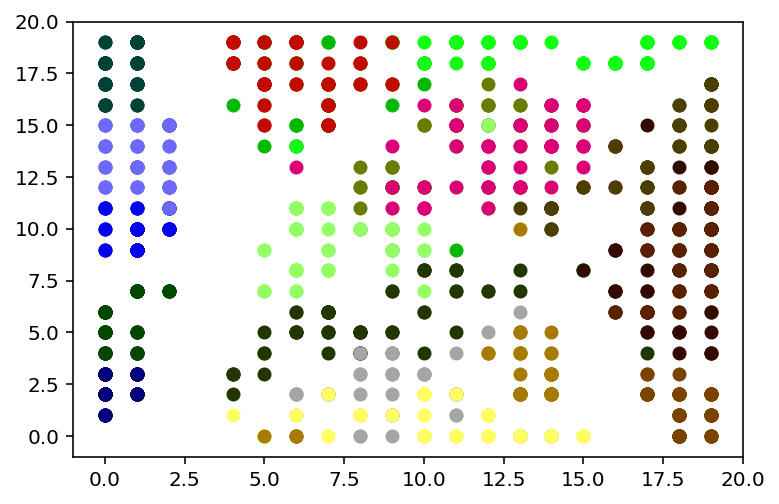

In [22]:
for index, dataset in enumerate(datadict["yi"].T):
    coords = my_som.classify(dataset)
    dataset_class = int(datadict["ly"].T[index])

    dataset_class_color = tuple(datadict["cm"].T[dataset_class])
    plt.plot(coords[0], coords[1], color=dataset_class_color, marker='o')
    
plt.axis([-1, n_cols, -1, n_rows])
print("Hier sieht man, wo die SOM die Evaluationsdatensätze einsortiert:")